In [2]:
import bk.load
import bk.signal
import bk.plot
import bk.compute

import neuroseries as nts
import matplotlib.pyplot as plt


import scipy.signal
from scipy.stats import zscore
import numpy as np

%matplotlib qt

In [3]:
def main(base_folder,local_path,*args,**kwargs):
    bk.load.current_session_linux(base_folder,local_path)
    states = bk.load.states()

    chans = {
        'hpc':bk.load.ripple_channel(),
        'bla_left':bk.load.bla_channels()['left'],
        'bla_right':bk.load.bla_channels()['right']
    }
    
    if np.isnan(chans['bla_right']): 
        chans.pop('bla_right')
        chans.update({'bla':chans['bla_left']})
        if np.isnan(chans['bla_left']): 
            return False
    else:
        chans.pop('bla_left')
        chans.update({'bla':chans['bla_right']})

    lfps = {}
    for stru,chan in chans.items():
        lfps.update({stru:bk.load.lfp_in_intervals(chan,states['Rem'])})
    
    powers = {}
    for stru,lfp in lfps.items():
        # powers.update({stru:bk.signal.enveloppe(bk.signal.passband(lfp,6,10,order = 2))})
        powers.update({stru:bk.signal.wavelet_bandpower(lfps[stru],6,10,10)})

    plt.figure()
    plt.hist2d(powers['hpc'],powers['bla'],300)
    plt.ylim(0,80)
    plt.xlim(0,120)


    reg = scipy.stats.linregress(powers['hpc'].values,powers['bla'])
    x = range(500)
    y = reg.slope * x + reg.intercept
    plt.plot(x,y,'r')
    plt.title('Theta Correlation REM Sleep')
    plt.xlabel('Theta Enveloppe (Hpc)')
    plt.ylabel('Theta Enveloppe (BLA)')
    # plt.clim(0,300)
    plt.show()
    plt.savefig('/home/billel/Documents/fig/wavelet-'+bk.load.session+'.png')
    plt.close()

In [5]:
bk.load.batch(main)

100%|██████████| 61/61 [1:36:43<00:00, 95.14s/it]

Batch finished in 5803.5805587768555
Some session were not processed correctly
['Rat08-20130718', 'Rat08-20130719', 'Rat08-20130720', 'Rat08-20130722', 'Rat09-20140324', 'Rat09-20140325', 'Rat09-20140326', 'Rat09-20140327', 'Rat09-20140328', 'Rat09-20140329', 'Rat09-20140331', 'Rat09-20140401', 'Rat09-20140402', 'Rat09-20140403', 'Rat09-20140404', 'Rat09-20140405', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat11-20150402', 'Rat11-20150403']
34.42622950819672 %


{'Rat08-20130708': None,
 'Rat08-20130709': None,
 'Rat08-20130710': None,
 'Rat08-20130711': None,
 'Rat08-20130712': None,
 'Rat08-20130713': None,
 'Rat08-20130715': None,
 'Rat08-20130716': None,
 'Rat08-20130717': None,
 'Rat10-20140619': None,
 'Rat10-20140620': None,
 'Rat10-20140622': None,
 'Rat10-20140624': None,
 'Rat10-20140626': None,
 'Rat10-20140627': None,
 'Rat10-20140628': None,
 'Rat10-20140629': None,
 'Rat10-20140701': None,
 'Rat10-20140702': None,
 'Rat10-20140703': None,
 'Rat10-20140704': None,
 'Rat10-20140705': False,
 'Rat10-20140707': False,
 'Rat10-20140708': False,
 'Rat11-20150310': False,
 'Rat11-20150312': False,
 'Rat11-20150313': False,
 'Rat11-20150314': False,
 'Rat11-20150315': False,
 'Rat11-20150316': False,
 'Rat11-20150317': False,
 'Rat11-20150321': None,
 'Rat11-20150323': None,
 'Rat11-20150325': None,
 'Rat11-20150326': None,
 'Rat11-20150327': None,
 'Rat11-20150328': None,
 'Rat11-20150330': None,
 'Rat11-20150331': None,
 'Rat11-2015040

In [42]:
inter = nts.IntervalSet(states['Rem'].iloc[1].start,states['Rem'].iloc[1].end)
lfp_cut = lfps['bla_left'].restrict(inter)

power = bk.signal.wavelet_bandpower(lfp_cut,50,80,10)
t,f,Sxx = bk.signal.wavelet_spectrogram(lfp_cut,50,80,30)
Sxx,t = scipy.signal.resample(Sxx,10000,t,axis = 1)


/tmp/ipykernel_278615/4081400487.py:1: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig,ax = plt.subplots(3,1,True)
/tmp/ipykernel_278615/4081400487.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolor(t,f,Sxx)


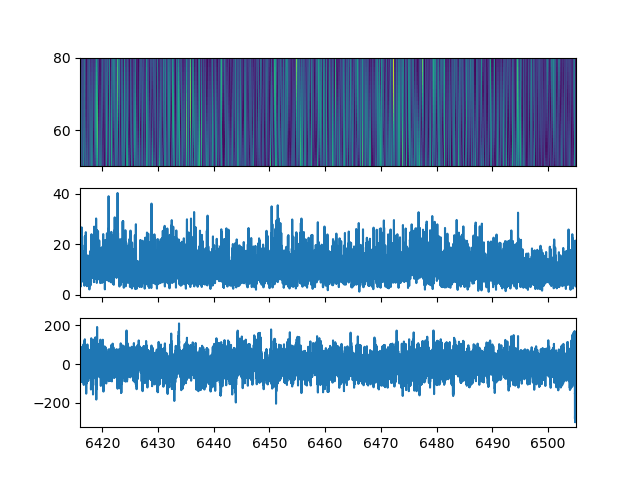

In [25]:
fig,ax = plt.subplots(3,1,True)
ax[0].pcolor(t,f,Sxx)
ax[1].plot(power.as_units('s'))
ax[2].plot(lfp_cut.as_units('s'))

In [18]:
bk.load.current_session_linux()
neurons, metadata = bk.load.spikes()
states = bk.load.states()



Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [19]:
chans = {
    'hpc':bk.load.ripple_channel(),
    'bla_left':bk.load.bla_channels()['left'],
    'bla_right':bk.load.bla_channels()['right']
}

if np.isnan(chans['bla_right']): 
    chans.pop('bla_right')
    chans.update({'bla':chans['bla_left']})
    if np.isnan(chans['bla_left']): 
        None
else:
    chans.pop('bla_left')
    chans.update({'bla':chans['bla_right']})

lfps = {}
for stru,chan in chans.items():
    lfps.update({stru:bk.load.lfp_in_intervals(chan,states['Rem'])})

powers = {}
for stru,lfp in lfps.items():
    # powers.update({stru:bk.signal.enveloppe(bk.signal.passband(lfp,6,10,order = 2))})
    powers.update({stru:bk.signal.wavelet_bandpower(lfps[stru],6,10,10)})

In [130]:
fr = {}
for stru in ['Hpc','BLA']:
    actmat = bk.compute.binSpikes(neurons[(metadata.Region == stru) & (metadata.Type == 'Pyr')],binSize = 0.1,as_Tsd= True)
    tot_fr = nts.Tsd(actmat.index.values,np.sum(actmat.values,1))
    tot_fr_rem = tot_fr.restrict(states['Rem'])
    fr.update({stru:tot_fr_rem})

In [128]:
for k in fr.keys(): print(k)

In [16]:
for stru in ['Hpc','bla']:
    power_aligned = powers['Hpc'].realign(fr[stru])
    
    plt.figure()
    plt.hist2d(power_aligned.values,fr[stru].values,30)

    reg = scipy.stats.linregress(power_aligned.values,fr[stru].values)
    x = range(150)
    y = reg.slope*x + reg.intercept
    plt.plot(x,y,'r')
    print(reg)

KeyError: 'Hpc'

In [17]:
actmat = bk.compute.binSpikes(neurons[(metadata.Region == 'BLA') & (metadata.Type == 'Pyr')],binSize = 1,as_Tsd= True)

power_aligned = power.realign(tot_fr_rem)
tot_fr_rem = bk.compute.nts_smooth(tot_fr_rem,10,1)

NameError: name 'neurons' is not defined

In [104]:
plt.plot(tot_fr_rem)

LinregressResult(slope=0.1268455067233107, intercept=50.256233162045426, rvalue=0.21480920155136096, pvalue=3.773896130115945e-26, stderr=0.011848989474495204, intercept_stderr=0.6324220913764759)

LinregressResult(slope=0.05083466027618675, intercept=26.580646427945712, rvalue=0.10658571749841896, pvalue=1.8562661158914967e-13, stderr=0.006887961602252322, intercept_stderr=0.3717166770060912)

In [55]:
reg

LinregressResult(slope=0.01784838520419015, intercept=57.995838926588306, rvalue=0.009245452341019771, pvalue=0.6527391060592111, stderr=0.03966154916375189, intercept_stderr=0.8489384956776209)

In [15]:
# bk.load.current_session_linux()
# states = bk.load.states()

# chans = {
#     'hpc':bk.load.ripple_channel(),
#     'bla_left':bk.load.bla_channels()['left'],
#     'bla_right':bk.load.bla_channels()['right']
# }

# if np.isnan(chans['bla_right']): 
#     chans.pop('bla_right')
#     chans.update({'bla':chans['bla_left']})
#     if np.isnan(chans['bla_left']): 
#         None
# else:
#     chans.pop('bla_left')
#     chans.update({'bla':chans['bla_right']})

# lfps = {}
# for stru,chan in chans.items():
#     lfps.update({stru:bk.load.lfp_in_intervals(chan,states['Rem'])})

# powers = {}
# for stru,lfp in lfps.items():
#     # powers.update({stru:bk.signal.enveloppe(bk.signal.passband(lfp,6,10,order = 2))})
#     powers.update({stru:bk.signal.wavelet_bandpower(lfps[stru],6,10,10)})

plt.figure()
plt.hist2d(powers['hpc'],powers['bla'],300)
plt.ylim(0,80)
plt.xlim(0,120)
plt.clim(0,250)


reg = scipy.stats.linregress(powers['hpc'].values,powers['bla'])
x = range(500)
y = reg.slope * x + reg.intercept
plt.plot(x,y,'r')
plt.title('Theta Correlation REM Sleep')
plt.xlabel('Theta Enveloppe (Hpc)')
plt.ylabel('Theta Enveloppe (BLA)')
# plt.clim(0,300)
plt.show()

In [5]:
reg

LinregressResult(slope=0.06821321581261383, intercept=15.532980161484712, rvalue=0.14367600941660263, pvalue=0.0, stderr=0.00027291926400707406, intercept_stderr=0.014723469704775047)

In [7]:
np.corrcoef(powers['hpc'].values,powers['bla'])

array([[1.        , 0.14367601],
       [0.14367601, 1.        ]])